# Machine Learning Engineer Nanodegree
## House Prices: Advanced Regression Techniques

In [90]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import median_absolute_error

# Pretty display for notebooks
%matplotlib inline

# Load training data
data = pd.read_csv('housing/train.csv')
print("The Kaggle housing dataset has {} data points with {} variables each.".format(*data.shape))

The Kaggle housing dataset has 1460 data points with 81 variables each.
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pav

In [78]:
df = data['MiscFeature']


1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


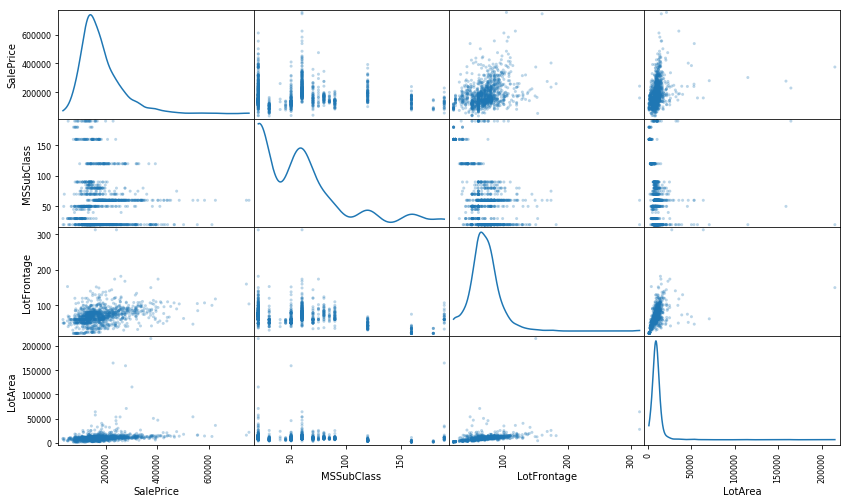

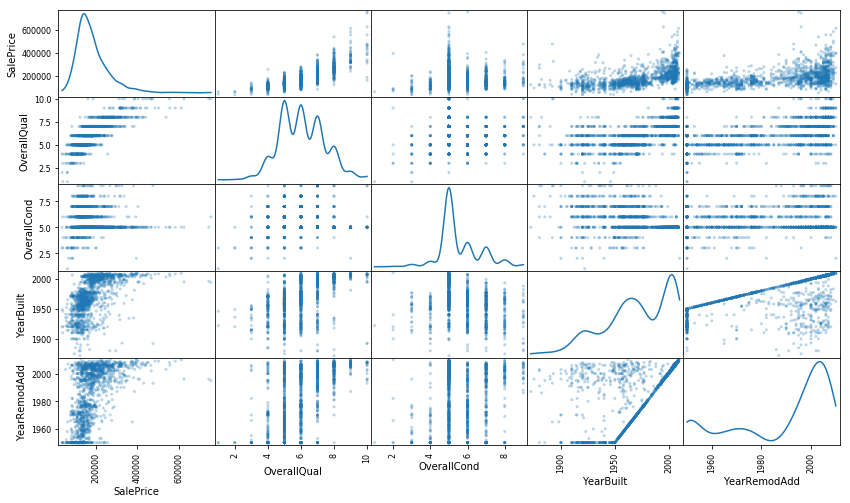

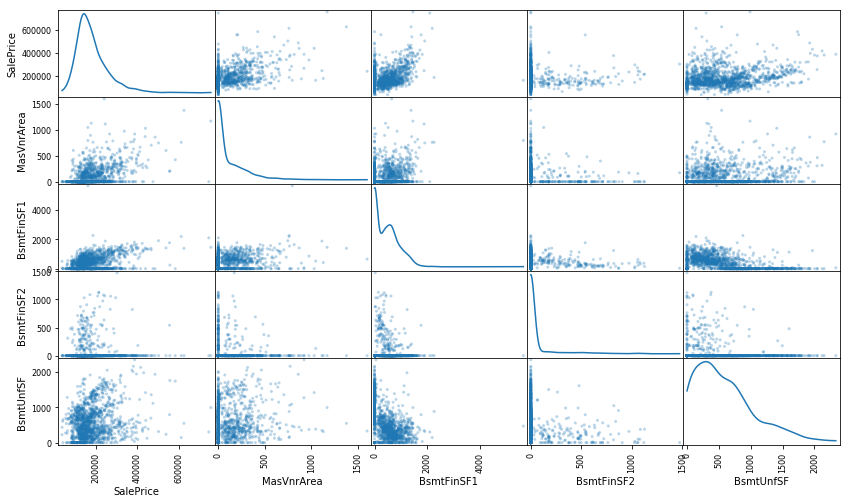

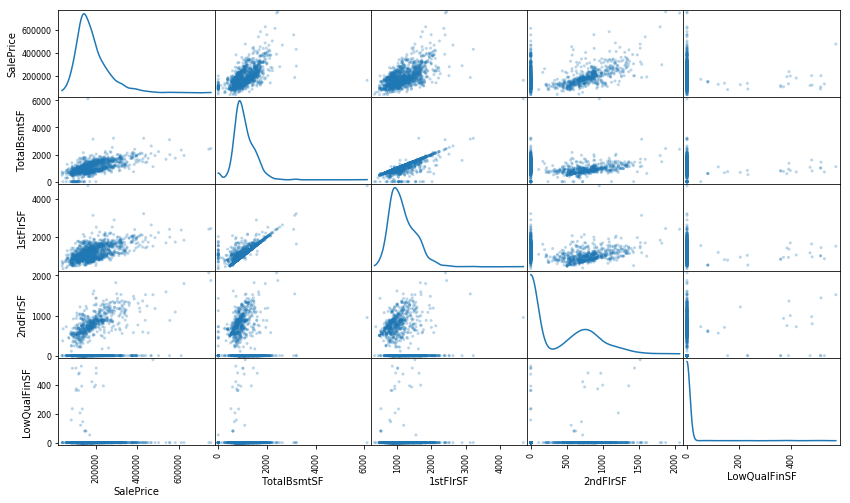

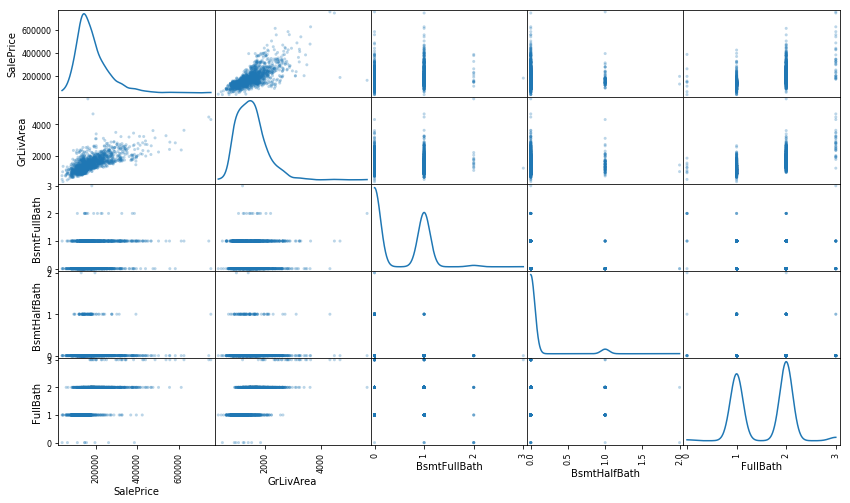

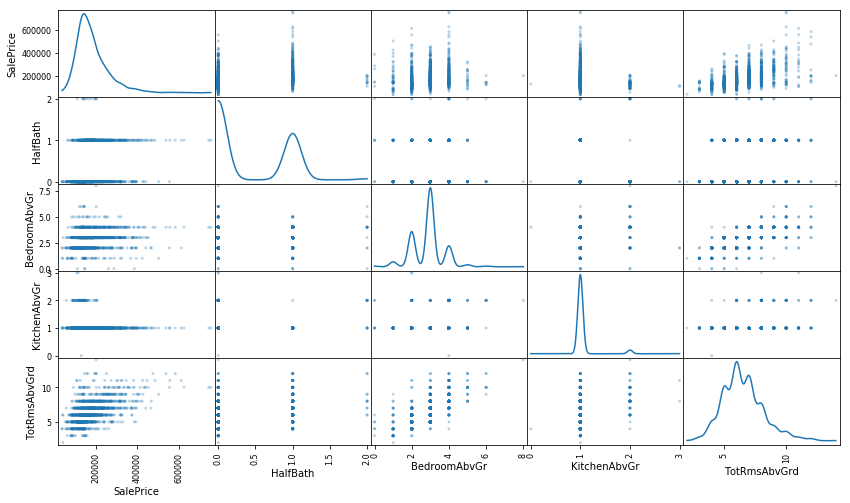

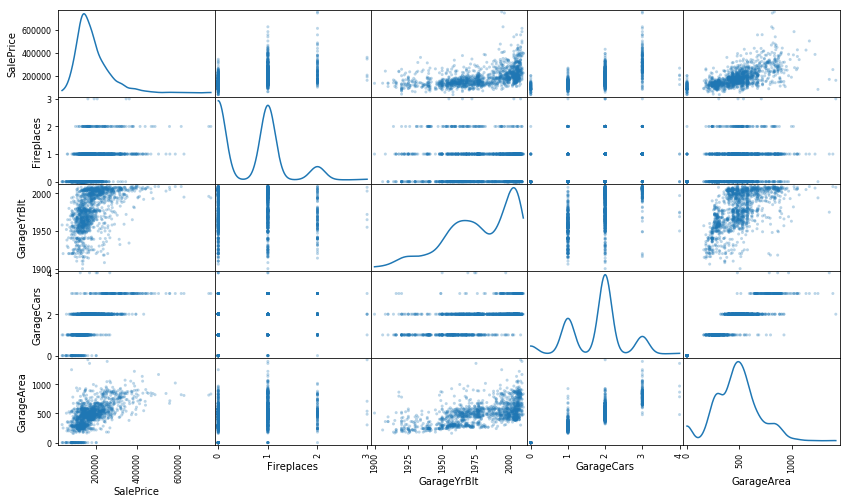

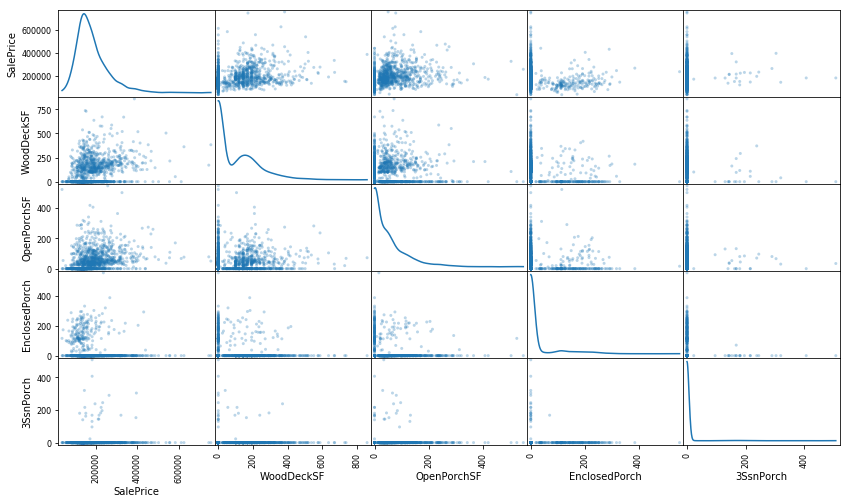

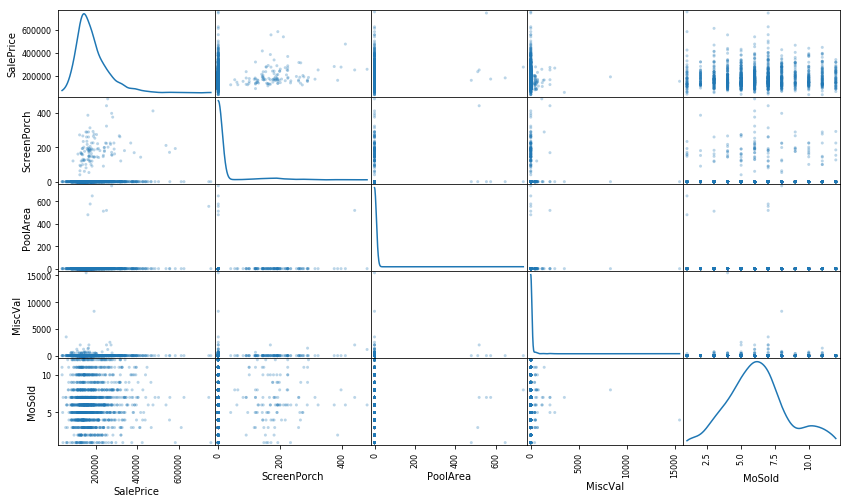

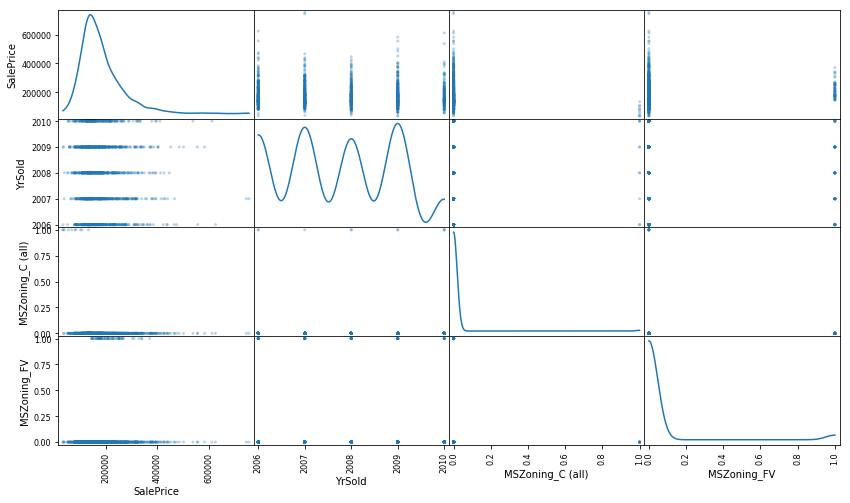

In [60]:

# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
data = pd.get_dummies(data)
columns = list(data.columns.values)
subsets = [['SalePrice']]
sub_index = 0

for index in range(1, len(columns)-1):
    if index % 4 == 0:
        sub_index += 1
        subsets.append(['SalePrice'])
    if columns[index] != 'SalePrice':
        subsets[sub_index].append(columns[index])

for subset in subsets[:5]:
    pd.plotting.scatter_matrix(data[subset], alpha = 0.3, figsize = (14,8), diagonal = 'kde');
for subset in subsets[5:10]:
    pd.plotting.scatter_matrix(data[subset], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [73]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  as lr
features = data[['YearBuilt', 'YrSold', 'LotArea', 'GrLivArea', '1stFlrSF']] #,'GrLivArea']]
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=.20, random_state=2)

# Success
print("Training and testing split was successful.")
clf = LinearRegression()
clf = clf.fit(X_train, y_train)
# 0.7429913215166164

Training and testing split was successful.


In [74]:
clf.score(X_test, y_test)

0.7325994849512116

Text(0,0.5,u'Predicted')

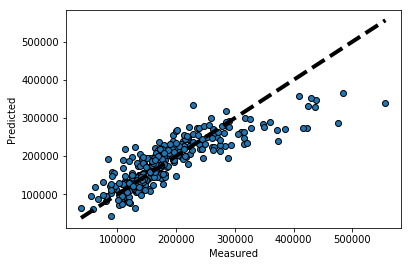

In [16]:
predicted = clf.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

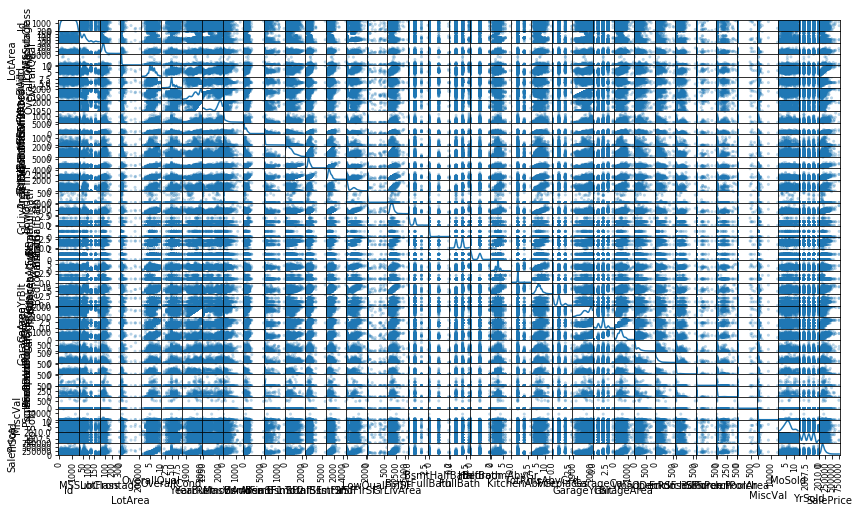